In [44]:
import os
from PIL import Image
import numpy as np

root_folder = "/Users/brishtiroy/Downloads/archive"

image_paths = []
labels = []

for folder in os.listdir(root_folder):
    subfolder = os.path.join(root_folder, folder)
    if os.path.isdir(subfolder):
        for filename in os.listdir(subfolder):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                image_paths.append(os.path.join(subfolder, filename))
                labels.append(folder)

print("Total images found:", len(image_paths))
print("Total classes:", len(set(labels)))


Total images found: 0
Total classes: 0


In [5]:
import os
import cv2

path = "/Users/brishtiroy/Downloads/archive/256_ObjectCategories"

images = []
shapes = []

for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            if img is not None:
                shapes.append(list(img.shape))
                images.append(img)

print("Total Images:", len(images))

unique_shapes = set(shapes)
print("Unique Shapes:", unique_shapes)

if len(unique_shapes) > 1:
    new_size = (128, 128)
    resized_images = [cv2.resize(img, new_size) for img in images]
    print("Reshaped All Images To:", new_size)
else:
    resized_images = images
    print("All images already same size:", shapes[0])


Total Images: 30509


TypeError: unhashable type: 'list'

In [1]:
import os
import cv2

path = "/Users/brishtiroy/Downloads/archive/256_ObjectCategories"

images = []
shapes = []

for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            if img is not None:
                shapes.append(img.shape)
                images.append(img)

print("Total Images:", len(images))

unique_shapes = set(shapes)
print("Unique Shapes:", unique_shapes)

if len(unique_shapes) > 1:
    new_size = (128, 128)
    resized_images = [cv2.resize(img, new_size) for img in images]
    print("Reshaped All Images To:", new_size)
else:
    resized_images = images
    print("All images already same size:", shapes[0])


Total Images: 30509
Unique Shapes: {(800, 599, 3), (301, 284, 3), (390, 366, 3), (269, 403, 3), (286, 433, 3), (390, 500, 3), (581, 773, 3), (404, 601, 3), (260, 226, 3), (509, 650, 3), (354, 303, 3), (338, 548, 3), (231, 162, 3), (756, 500, 3), (390, 317, 3), (407, 347, 3), (346, 401, 3), (233, 419, 3), (378, 473, 3), (240, 156, 3), (151, 399, 3), (504, 756, 3), (504, 360, 3), (241, 169, 3), (487, 464, 3), (269, 433, 3), (329, 450, 3), (608, 427, 3), (225, 255, 3), (391, 646, 3), (229, 325, 3), (492, 650, 3), (223, 339, 3), (277, 420, 3), (395, 588, 3), (160, 265, 3), (406, 498, 3), (151, 216, 3), (265, 314, 3), (107, 300, 3), (381, 432, 3), (171, 125, 3), (333, 209, 3), (264, 514, 3), (600, 841, 3), (455, 550, 3), (162, 210, 3), (337, 254, 3), (276, 174, 3), (499, 600, 3), (280, 378, 3), (151, 167, 3), (208, 255, 3), (475, 650, 3), (260, 420, 3), (320, 303, 3), (277, 450, 3), (162, 423, 3), (216, 504, 3), (276, 387, 3), (203, 148, 3), (540, 513, 3), (190, 163, 3), (500, 667, 3), (560

Final Dataset Shape: (30509, 128, 128, 3)
Labels Shape: (30509,)
Image Size Used: (128, 128)
Classes: 256


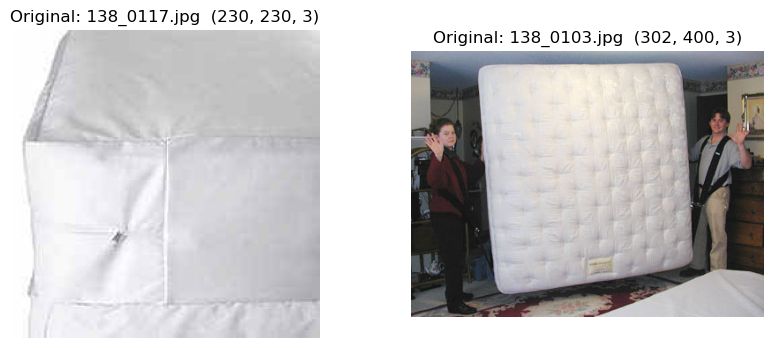

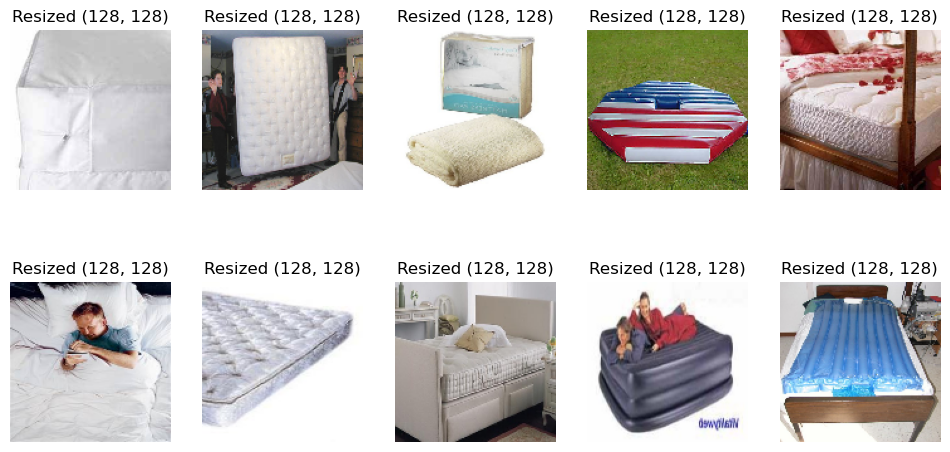

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

root = "/Users/brishtiroy/Downloads/archive/256_ObjectCategories"
final_size = (128, 128)

original_examples = []
original_titles = []
X = []
y = []

for folder in os.listdir(root):
    folder_path = os.path.join(root, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)

            if img is not None:
                if len(original_examples) < 2:
                    original_examples.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                    original_titles.append(f"{file}  {img.shape}")

                resized = cv2.resize(img, final_size)
                X.append(resized)
                y.append(folder)

X = np.array(X)
y = np.array(y)

print("Final Dataset Shape:", X.shape)
print("Labels Shape:", y.shape)
print("Image Size Used:", final_size)
print("Classes:", len(np.unique(y)))

plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(original_examples[i])
    plt.title("Original: " + original_titles[i])
    plt.axis("off")
plt.show()

plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Resized {final_size}")
    plt.axis("off")
plt.show()


In [3]:
print({img.shape for img in X})

{(128, 128, 3)}
